In [1]:
from skimage import io, color
import matplotlib.pyplot as plt
from skimage.transform import rescale

In [2]:
def load_transform(image_path):
    img = io.imread(image_path)
    img_gray = color.rgb2gray(img)
    image_rescaled = rescale(img_gray, 1.0 / 3.0, anti_aliasing=False)
    return image_rescaled



/home/andres/thesis/thesis/lib/python3.5/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/andres/thesis/thesis/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


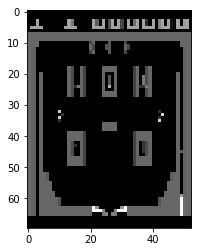

In [28]:
plt.imshow(load_transform('/home/andres/thesis/samples/pinball/atari_v1/screens/pinball/1/500.png'))
#plt.imshow(io.imread('/home/andres/thesis/samples/pinball/atari_v1/screens/pinball/1/500.png'))

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 128  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(3710,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(3710, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

Using TensorFlow backend.


In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

type(x_train)

In [6]:
from os import listdir, path


In [15]:
import numpy as np
data_path = '/home/andres/thesis/samples/mspacman/atari_v1/screens/mspacman/8'

data_paths = [path.join(data_path, image) for image in listdir(data_path)]

data = []
for image in data_paths:
    data.append(load_transform(image))

data = np.array(data)
print("loaded shape: ", data.shape)

/home/andres/thesis/thesis/lib/python3.5/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/andres/thesis/thesis/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


loaded shape:  (1569, 70, 53)


In [16]:
x_train = data[0:1255]
x_test = data[1255:]

In [17]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(1255, 3710)
(314, 3710)


In [18]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1255 samples, validate on 314 samples
Epoch 1/100
1255/1255 [==============================] - 1s 565us/step - loss: 0.6447 - val_loss: 0.5339
Epoch 2/100
1255/1255 [==============================] - 1s 571us/step - loss: 0.4427 - val_loss: 0.3929
Epoch 3/100
1255/1255 [==============================] - 1s 553us/step - loss: 0.3882 - val_loss: 0.3850
Epoch 4/100
1255/1255 [==============================] - 1s 559us/step - loss: 0.3845 - val_loss: 0.3833
Epoch 5/100
1255/1255 [==============================] - 1s 556us/step - loss: 0.3833 - val_loss: 0.3824
Epoch 6/100
1255/1255 [==============================] - 1s 567us/step - loss: 0.3826 - val_loss: 0.3819
Epoch 7/100
1255/1255 [==============================] - 1s 562us/step - loss: 0.3822 - val_loss: 0.3816
Epoch 8/100
1255/1255 [==============================] - 1s 562us/step - loss: 0.3820 - val_loss: 0.3814
Epoch 9/100
1255/1255 [==============================] - 1s 565us/step - loss: 0.3818 - val_loss: 0.3812
Epoch 10

Epoch 78/100
1255/1255 [==============================] - 1s 592us/step - loss: 0.3808 - val_loss: 0.3803
Epoch 79/100
1255/1255 [==============================] - 1s 621us/step - loss: 0.3808 - val_loss: 0.3803
Epoch 80/100
1255/1255 [==============================] - 1s 555us/step - loss: 0.3808 - val_loss: 0.3803
Epoch 81/100
1255/1255 [==============================] - 1s 650us/step - loss: 0.3808 - val_loss: 0.3803
Epoch 82/100
1255/1255 [==============================] - 1s 558us/step - loss: 0.3808 - val_loss: 0.3803
Epoch 83/100
1255/1255 [==============================] - 1s 578us/step - loss: 0.3807 - val_loss: 0.3803
Epoch 84/100
1255/1255 [==============================] - 1s 569us/step - loss: 0.3807 - val_loss: 0.3803
Epoch 85/100
1255/1255 [==============================] - 1s 563us/step - loss: 0.3807 - val_loss: 0.3803
Epoch 86/100
1255/1255 [==============================] - 1s 560us/step - loss: 0.3807 - val_loss: 0.3803
Epoch 87/100
1255/1255 [======================

In [19]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
data.shape

(1569, 70, 53)

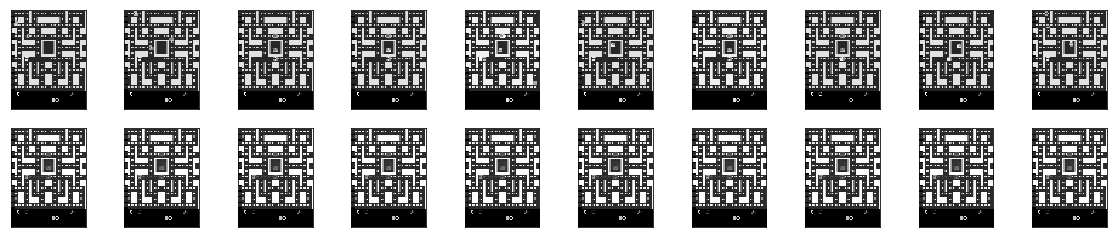

In [20]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(70, 53))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(70, 53))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_imgs[1]

In [ ]:
encoded_imgs[1]

In [ ]:
data_paths